In [1]:
import os
import re
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from scipy.sparse import hstack
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saileshrajaputra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/saileshrajaputra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
dataset_path = "/Users/saileshrajaputra/Downloads/personal/bri/syr/smdm/project/dataset/SMDM_Project_DataSet_V3.csv"

In [4]:
validation_dataset_path = "/Users/saileshrajaputra/Downloads/personal/bri/syr/smdm/project/dataset/SMDM_Project_Validation_Set_V1.csv"

In [5]:
df = pd.read_csv(dataset_path)

/var/folders/w1/mw0q783s1b5bj1lkrz62mvwr0000gp/T/ipykernel_9937/2793407076.py:1: DtypeWarning: Columns (41,82,97) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path)


In [6]:
validation_df = pd.read_csv(validation_dataset_path)

In [7]:
df.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,link_flair_template_id,is_gallery,media_metadata,gallery_data,post_url_from_permalink,updated_ups,updated_at,crosspost_parent_list,crosspost_parent,author_cakeday
0,NaN,pics,NaN,t2_nvs8bgmct,False,NaN,0,False,48,[],...,NaN,NaN,NaN,NaN,https://reddit.com/r/pics/comments/1jf4ouq/48/,162.000000,2025-03-31 14:54:16,NaN,NaN,NaN
1,NaN,AskReddit,NaN,t2_a4d033l7,False,NaN,0,False,"Ex Karen’s, what made you realize you were a K...",[],...,NaN,NaN,NaN,NaN,https://reddit.com/r/AskReddit/comments/1jf4op...,0.000000,2025-03-31 14:54:16,NaN,NaN,NaN
2,NaN,AskReddit,NaN,t2_22a7spon,False,NaN,0,False,What’s the worst name you’ve ever heard someon...,[],...,NaN,NaN,NaN,NaN,https://reddit.com/r/AskReddit/comments/1jf4of...,81.000000,2025-03-31 14:54:16,NaN,NaN,NaN
3,NaN,AskReddit,NaN,t2_dbitrqbp,False,NaN,0,False,What was the reason that made you decide to re...,[],...,NaN,NaN,NaN,NaN,https://reddit.com/r/AskReddit/comments/1jf4o0...,792.092554,2025-03-31 14:54:16,NaN,NaN,NaN
4,NaN,AskReddit,NaN,t2_6lrmnwdz,False,NaN,0,False,What is your city known for ?,[],...,NaN,NaN,NaN,NaN,https://reddit.com/r/AskReddit/comments/1jf4no...,9855.000000,2025-03-31 14:54:16,NaN,NaN,NaN


In [8]:
validation_df.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,url_overridden_by_dest,preview,link_flair_template_id,is_gallery,media_metadata,gallery_data,updated_ups,updated_at,crosspost_parent_list,crosspost_parent
0,NaN,AskReddit,NaN,t2_1mu4qhqhz7,False,NaN,0,False,What's the first game you spent hundreds of ho...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,3575,2025-04-14 23:59:59,NaN,NaN
1,NaN,law,NaN,t2_10wijw23wg,False,NaN,0,False,BREAKING: Judge Boasberg finds Trump officials...,[],...,https://www.irishstar.com/news/us-news/breakin...,{'images': [{'source': {'url': 'https://extern...,92ea8972-dca0-11ee-964c-bea59678bde5,NaN,NaN,NaN,15897,2025-04-14 23:59:59,NaN,NaN
2,NaN,thescoop,He and his wife were waiting for their lawyer ...,t2_4mn2e,False,NaN,0,False,"On Monday, federal agents smashed the window o...",[],...,https://v.redd.it/10vsgdla74ve1,{'images': [{'source': {'url': 'https://extern...,f0b02f78-df0e-11ef-a82b-06d054f9f415,NaN,NaN,NaN,17352,2025-04-14 23:59:59,NaN,NaN
3,NaN,pics,NaN,t2_fce02zg,False,NaN,0,False,"[oc] on back of sign in Washington, D.C.",[],...,https://i.redd.it/0n14wwrpy7ve1.jpeg,{'images': [{'source': {'url': 'https://previe...,NaN,NaN,NaN,NaN,25025,2025-04-14 23:59:59,NaN,NaN
4,NaN,gaming,How do they justify this?,t2_rc3i0,False,NaN,0,False,Sony is taking the piss with these price incre...,[],...,https://i.redd.it/z85lnl2md6ve1.jpeg,{'images': [{'source': {'url': 'https://previe...,NaN,NaN,NaN,NaN,21462,2025-04-14 23:59:59,NaN,NaN


In [9]:
df.columns

Index(['approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved',
       'mod_reason_title', 'gilded', 'clicked', 'title', 'link_flair_richtext',
       ...
       'link_flair_template_id', 'is_gallery', 'media_metadata',
       'gallery_data', 'post_url_from_permalink', 'updated_ups', 'updated_at',
       'crosspost_parent_list', 'crosspost_parent', 'author_cakeday'],
      dtype='object', length=117)

In [10]:
validation_df.columns

Index(['approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved',
       'mod_reason_title', 'gilded', 'clicked', 'title', 'link_flair_richtext',
       ...
       'url_overridden_by_dest', 'preview', 'link_flair_template_id',
       'is_gallery', 'media_metadata', 'gallery_data', 'updated_ups',
       'updated_at', 'crosspost_parent_list', 'crosspost_parent'],
      dtype='object', length=115)

In [11]:
df.shape

(9200, 117)

In [12]:
validation_df.shape

(200, 115)

In [13]:
validation_df['author_cakeday'] = None
validation_df['post_url_from_permalink'] = None

In [14]:
sorted(df.columns.to_list())

['all_awardings',
 'allow_live_comments',
 'approved_at_utc',
 'approved_by',
 'archived',
 'author',
 'author_cakeday',
 'author_flair_background_color',
 'author_flair_css_class',
 'author_flair_richtext',
 'author_flair_template_id',
 'author_flair_text',
 'author_flair_text_color',
 'author_flair_type',
 'author_fullname',
 'author_is_blocked',
 'author_patreon_flair',
 'author_premium',
 'awarders',
 'banned_at_utc',
 'banned_by',
 'can_gild',
 'can_mod_post',
 'category',
 'clicked',
 'content_categories',
 'contest_mode',
 'created',
 'created_utc',
 'crosspost_parent',
 'crosspost_parent_list',
 'discussion_type',
 'distinguished',
 'domain',
 'downs',
 'edited',
 'gallery_data',
 'gilded',
 'gildings',
 'hidden',
 'hide_score',
 'id',
 'is_created_from_ads_ui',
 'is_crosspostable',
 'is_gallery',
 'is_meta',
 'is_original_content',
 'is_reddit_media_domain',
 'is_robot_indexable',
 'is_self',
 'is_video',
 'likes',
 'link_flair_background_color',
 'link_flair_css_class',
 'lin

In [15]:
# Drop columns that don't have any use to us 
drop_columns = [
    'all_awardings',
    'allow_live_comments',
    'approved_at_utc',
    'approved_by',
    'archived',
    'author',
    'author_cakeday',
    'author_flair_background_color',
    'author_flair_css_class',
    'author_flair_richtext',
    'author_flair_template_id',
    'author_flair_text',
    'author_flair_text_color',
    'author_flair_type',
    'author_fullname',
    'author_is_blocked',
    'author_patreon_flair',
    'author_premium',
    'awarders',
    'banned_at_utc',
    'banned_by',
    'can_gild',
    'can_mod_post',
    # 'category',
    'clicked',
    # 'content_categories',
    'contest_mode',
    # 'created',
    # 'created_utc',
    'crosspost_parent',
    'crosspost_parent_list',
    # 'discussion_type',
    'distinguished',
    'domain',
    # 'downs',
    'edited',
    'gallery_data',
    'gilded',
    'gildings',
    'hidden',
    'hide_score',
    'id',
    'is_created_from_ads_ui',
    'is_crosspostable',
    'is_gallery',
    'is_meta',
    'is_original_content',
    'is_reddit_media_domain',
    'is_robot_indexable',
    'is_self',
    # 'is_video',
    # 'likes',
    'link_flair_background_color',
    'link_flair_css_class',
    'link_flair_richtext',
    'link_flair_template_id',
    'link_flair_text',
    'link_flair_text_color',
    'link_flair_type',
    'locked',
    'media',
    'media_embed',
    'media_metadata',
    'media_only',
    'mod_note',
    'mod_reason_by',
    'mod_reason_title',
    'mod_reports',
    # 'name',
    'no_follow',
    # 'num_comments',
    # 'num_crossposts',
    # 'num_reports',
    # 'over_18',
    'permalink',
    'pinned',
    'post_hint',
    'post_url_from_permalink',
    'preview',
    'pwls',
    'quarantine',
    'removal_reason',
    'removed_by',
    'removed_by_category',
    'report_reasons',
    'saved',
    # 'score',
    'secure_media',
    'secure_media_embed',
    'selftext',
    'selftext_html',
    'send_replies',
    'spoiler',
    'stickied',
    # 'subreddit',
    'subreddit_id',
    'subreddit_name_prefixed',
    # 'subreddit_subscribers',
    # 'subreddit_type',
    'suggested_sort',
    'thumbnail',
    'thumbnail_height',
    'thumbnail_width',
    # 'title',
    'top_awarded_type',
    'total_awards_received',
    'treatment_tags',
    # 'updated_at',
    # 'updated_ups',
    # 'ups',
    # 'upvote_ratio',
    'url',
    'url_overridden_by_dest',
    # 'user_reports',
    # 'view_count',
    'visited',
    'wls'
]

In [16]:
df.drop(columns=drop_columns, axis=1, inplace=True)

In [17]:
validation_df.drop(columns=drop_columns, axis=1, inplace=True)

In [18]:
df.head()

,subreddit,title,downs,name,upvote_ratio,subreddit_type,ups,user_reports,category,score,...,over_18,num_reports,discussion_type,num_comments,subreddit_subscribers,created_utc,num_crossposts,is_video,updated_ups,updated_at
0,pics,48,0,t3_1jf4ouq,1.0,public,1,[],NaN,1,...,False,NaN,NaN,0,31807091,1.742411e+09,0,False,162.000000,2025-03-31 14:54:16
1,AskReddit,"Ex Karen’s, what made you realize you were a K...",0,t3_1jf4op1,1.0,public,1,[],NaN,1,...,False,NaN,NaN,0,52983358,1.742411e+09,0,False,0.000000,2025-03-31 14:54:16
2,AskReddit,What’s the worst name you’ve ever heard someon...,0,t3_1jf4off,1.0,public,1,[],NaN,1,...,False,NaN,NaN,1,52983358,1.742411e+09,0,False,81.000000,2025-03-31 14:54:16
3,AskReddit,What was the reason that made you decide to re...,0,t3_1jf4o0c,1.0,public,2,[],NaN,2,...,False,NaN,NaN,0,52983358,1.742411e+09,0,False,792.092554,2025-03-31 14:54:16
4,AskReddit,What is your city known for ?,0,t3_1jf4noe,1.0,public,2,[],NaN,2,...,False,NaN,NaN,2,52983358,1.742411e+09,0,False,9855.000000,2025-03-31 14:54:16


In [19]:
df.shape

(9200, 24)

In [20]:
validation_df.shape

(200, 24)

In [21]:
df.columns.tolist()

['subreddit',
 'title',
 'downs',
 'name',
 'upvote_ratio',
 'subreddit_type',
 'ups',
 'user_reports',
 'category',
 'score',
 'content_categories',
 'created',
 'likes',
 'view_count',
 'over_18',
 'num_reports',
 'discussion_type',
 'num_comments',
 'subreddit_subscribers',
 'created_utc',
 'num_crossposts',
 'is_video',
 'updated_ups',
 'updated_at']

### Numerical column analysis

In [22]:
numerical_columns = [
    "downs", 
    "ups", 
    "upvote_ratio", 
    "score", 
    "likes", 
    "view_count", 
    "num_comments", 
    "subreddit_subscribers", 
    "updated_ups", 
    "num_crossposts",
    "num_reports"
]

In [23]:
for column in numerical_columns:
    print(f"Analysis for '{column}'")
    # Cast the column to be numeric 
    df[column] = pd.to_numeric(df[column], errors="coerce")
    validation_df[column] = pd.to_numeric(validation_df[column], errors="coerce")
    min_value = df[column].min()
    max_value = df[column].max()
    mean_value = df[column].mean()
    std_value = df[column].std()
    num_rows = df.shape[0]
    num_nans = df[column].isna().sum()
    print(f"Min      : {min_value}")
    print(f"Max      : {max_value}")
    print(f"Mean     : {mean_value}")
    print(f"Std. Dev : {std_value}")
    print(f"No. rows : {num_rows}")
    print(f"No. NaN's: {num_nans}")

Analysis for 'downs'
Min      : 0
Max      : 0
Mean     : 0.0
Std. Dev : 0.0
No. rows : 9200
No. NaN's: 0
Analysis for 'ups'
Min      : 0
Max      : 938
Mean     : 5.003913043478261
Std. Dev : 25.72071871354834
No. rows : 9200
No. NaN's: 0
Analysis for 'upvote_ratio'
Min      : 0.05
Max      : 1.0
Mean     : 0.8369641304347826
Std. Dev : 0.23795261896196948
No. rows : 9200
No. NaN's: 0
Analysis for 'score'
Min      : 0
Max      : 938
Mean     : 5.003913043478261
Std. Dev : 25.72071871354834
No. rows : 9200
No. NaN's: 0
Analysis for 'likes'
Min      : nan
Max      : nan
Mean     : nan
Std. Dev : nan
No. rows : 9200
No. NaN's: 9200
Analysis for 'view_count'
Min      : nan
Max      : nan
Mean     : nan
Std. Dev : nan
No. rows : 9200
No. NaN's: 9200
Analysis for 'num_comments'
Min      : 0
Max      : 345
Mean     : 4.473804347826087
Std. Dev : 8.841403693314902
No. rows : 9200
No. NaN's: 0
Analysis for 'subreddit_subscribers'
Min      : 13636911
Max      : 66645202
Mean     : 44151061.3208

In [24]:
# Check why score and ups have the same distribution 
df["score"].equals(df["ups"])

True

## Conlusions from above observations: 
1. The 'downs' column does not provide us any value - hence, can be dropped 
2. 'score' and 'ups' columns are the same thing - hence, the score column can be dropped
3. The 'likes' has no data - hence, can be dropped 
4. The 'view_count' column has no data! - hence, can be dropped
5. The column 'num_crossposts' has a max value of 3 .. which means that a majority of the posts are not crossposted multiple times. might not contain much value
6. The column 'num_reports' has no data - hence, can be dropped
7. We can figure out the number of downvotes on a post by applying the upvote ratio 
8. The column 'updated_ups' has a bunch of NaN's which need to be filled with 0's - this is an artifact of the data collection technique

In [25]:
# Drop the useless numerical columns 

In [26]:
columns_to_drop = ["downs", "score", "likes", "view_count", "num_reports"]
columns_to_drop = [column for column in columns_to_drop if column in df.columns]
df.drop(
    columns_to_drop,
    axis=1,
    inplace=True
)
validation_df.drop(
    columns_to_drop,
    axis=1, 
    inplace=True
)

In [27]:
non_numerical_columns = [column for column in df.columns if column not in numerical_columns]

In [28]:
df[non_numerical_columns].head()

,subreddit,title,name,subreddit_type,user_reports,category,content_categories,created,over_18,discussion_type,created_utc,is_video,updated_at
0,pics,48,t3_1jf4ouq,public,[],NaN,['photography'],1.742411e+09,False,NaN,1.742411e+09,False,2025-03-31 14:54:16
1,AskReddit,"Ex Karen’s, what made you realize you were a K...",t3_1jf4op1,public,[],NaN,NaN,1.742411e+09,False,NaN,1.742411e+09,False,2025-03-31 14:54:16
2,AskReddit,What’s the worst name you’ve ever heard someon...,t3_1jf4off,public,[],NaN,NaN,1.742411e+09,False,NaN,1.742411e+09,False,2025-03-31 14:54:16
3,AskReddit,What was the reason that made you decide to re...,t3_1jf4o0c,public,[],NaN,NaN,1.742411e+09,False,NaN,1.742411e+09,False,2025-03-31 14:54:16
4,AskReddit,What is your city known for ?,t3_1jf4noe,public,[],NaN,NaN,1.742411e+09,False,NaN,1.742411e+09,False,2025-03-31 14:54:16


In [29]:
# Cast non-numeric columns to appropriate data type 
df["subreddit"] = df["subreddit"].astype(str)
df["title"] = df["title"].astype(str) 
df["name"] = df["name"].astype(str)
df["subreddit_type"] = df["subreddit_type"].astype(str)
df["user_reports"] = df["user_reports"].astype(str) # This is actually a list in string format - needs to be re-cast 
df["category"] = df["category"].astype(str)
df["content_categories"] = df["content_categories"].astype(str) 
df["created"] = df["created"].astype(str)
df["over_18"] = df["over_18"].astype(str)
df["discussion_type"] = df["discussion_type"].astype(str)
df["created_utc"] = df["created_utc"].astype(str)
df["is_video"] = df["is_video"].astype(str) # Cast to boolean 
df["updated_at"] = df["updated_at"].astype(str)

In [30]:
# Cast non-numeric columns to appropriate data type 
validation_df["subreddit"] = validation_df["subreddit"].astype(str)
validation_df["title"] = validation_df["title"].astype(str) 
validation_df["name"] = validation_df["name"].astype(str)
validation_df["subreddit_type"] = validation_df["subreddit_type"].astype(str)
validation_df["user_reports"] = validation_df["user_reports"].astype(str) # This is actually a list in string format - needs to be re-cast 
validation_df["category"] = validation_df["category"].astype(str)
validation_df["content_categories"] = validation_df["content_categories"].astype(str) 
validation_df["created"] = validation_df["created"].astype(str)
validation_df["over_18"] = validation_df["over_18"].astype(str)
validation_df["discussion_type"] = validation_df["discussion_type"].astype(str)
validation_df["created_utc"] = validation_df["created_utc"].astype(str)
validation_df["is_video"] = validation_df["is_video"].astype(str) # Cast to boolean 
validation_df["updated_at"] = validation_df["updated_at"].astype(str)

In [31]:
df["user_reports"].unique().tolist()

['[]']

In [32]:
df["discussion_type"].unique().tolist()

['nan']

In [33]:
df["content_categories"].unique().tolist()

["['photography']", 'nan', "['diy_and_crafts']", "['writing']"]

In [34]:
df["content_categories"].value_counts()

content_categories
nan                   8810
['photography']        237
['writing']             77
['diy_and_crafts']      76
Name: count, dtype: int64

In [35]:
df["subreddit_type"].unique().tolist()

['public']

In [36]:
df["category"].unique().tolist()

['nan']

In [37]:
df["is_video"].value_counts()

is_video
False    9061
True      139
Name: count, dtype: int64

In [38]:
df["over_18"].value_counts()

over_18
False    8865
True      335
Name: count, dtype: int64

## Conclusions from above observations 
1. 'user_reports' column does not contain any data - hence, can be dropped 
2. 'discussion_type' column does not contain any data - hence, can be dropped
3. 'content_categories' are actually quite limited, most of them being NaN. Instead of trying to impute null content categories - we can try to infer this information from the title itself. But at that point, this column can become reduntant with the title column. Considering the number of null values, it is better to drop this column.
4. 'subreddit_type' does not convey any information since all sub-reddits whose data is available to use are public - hence, can be dropped
5. 'category' column does not contain any information - hence, can be dropped 

In [39]:
columns_to_drop = ['user_reports', 'discussion_type', 'content_categories', 'subreddit_type', 'category']
columns_to_drop = [column for column in columns_to_drop if column in df.columns]
df.drop(
    columns_to_drop,
    axis=1,
    inplace=True
)
validation_df.drop(
    columns_to_drop,
    axis=1,
    inplace=True
)

In [40]:
df.head()

,subreddit,title,name,upvote_ratio,ups,created,over_18,num_comments,subreddit_subscribers,created_utc,num_crossposts,is_video,updated_ups,updated_at
0,pics,48,t3_1jf4ouq,1.0,1,1742410672.0,False,0,31807091,1742410672.0,0,False,162.000000,2025-03-31 14:54:16
1,AskReddit,"Ex Karen’s, what made you realize you were a K...",t3_1jf4op1,1.0,1,1742410662.0,False,0,52983358,1742410662.0,0,False,0.000000,2025-03-31 14:54:16
2,AskReddit,What’s the worst name you’ve ever heard someon...,t3_1jf4off,1.0,1,1742410643.0,False,1,52983358,1742410643.0,0,False,81.000000,2025-03-31 14:54:16
3,AskReddit,What was the reason that made you decide to re...,t3_1jf4o0c,1.0,2,1742410614.0,False,0,52983358,1742410614.0,0,False,792.092554,2025-03-31 14:54:16
4,AskReddit,What is your city known for ?,t3_1jf4noe,1.0,2,1742410591.0,False,2,52983358,1742410591.0,0,False,9855.000000,2025-03-31 14:54:16


In [41]:
df.shape

(9200, 14)

We are now left with 14 columns. Let's try to figure out how many of these are fit for modelling 

/var/folders/w1/mw0q783s1b5bj1lkrz62mvwr0000gp/T/ipykernel_9937/3607625801.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


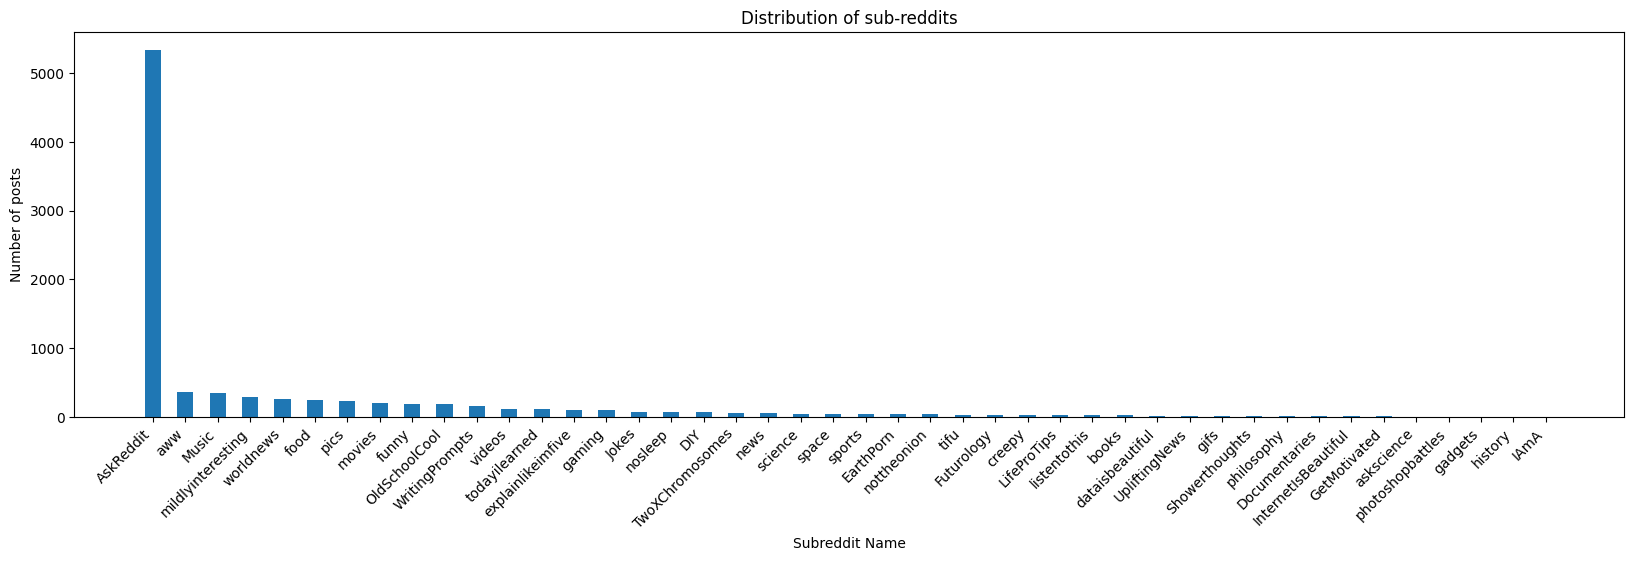

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))

categories = df["subreddit"].value_counts().index 
values = df["subreddit"].value_counts().values
ax.bar(categories, values, width=0.5)
ax.set_xlabel("Subreddit Name")
ax.set_ylabel("Number of posts")
ax.set_title("Distribution of sub-reddits")
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
fig.show()

/var/folders/w1/mw0q783s1b5bj1lkrz62mvwr0000gp/T/ipykernel_9937/1989542954.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


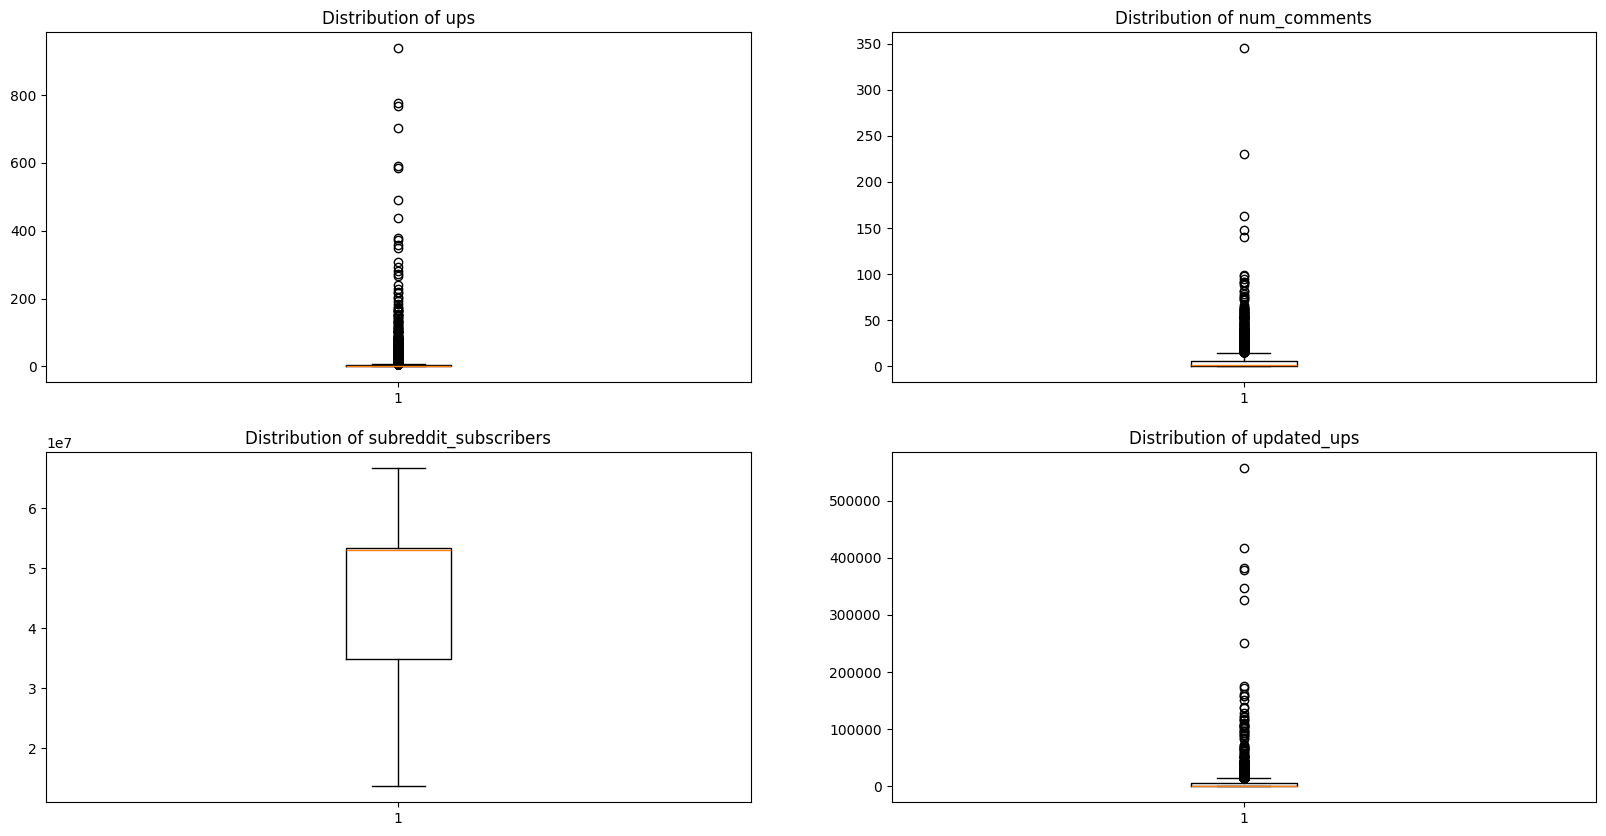

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

boxplot_columns = [
    "ups",
    "num_comments",
    "subreddit_subscribers",
    "updated_ups"
]

ax = axes[0][0] 
ax.boxplot(df["ups"])
ax.set_title(f"Distribution of ups")

ax = axes[0][1]
ax.boxplot(df["num_comments"])
ax.set_title(f"Distribution of num_comments")

ax = axes[1][0]
ax.boxplot(df["subreddit_subscribers"])
ax.set_title(f"Distribution of subreddit_subscribers")

ax = axes[1][1]
ax.boxplot(pd.to_numeric(df["updated_ups"], errors="coerce").fillna(0))
ax.set_title(f"Distribution of updated_ups")

fig.show()

/var/folders/w1/mw0q783s1b5bj1lkrz62mvwr0000gp/T/ipykernel_9937/1377323798.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


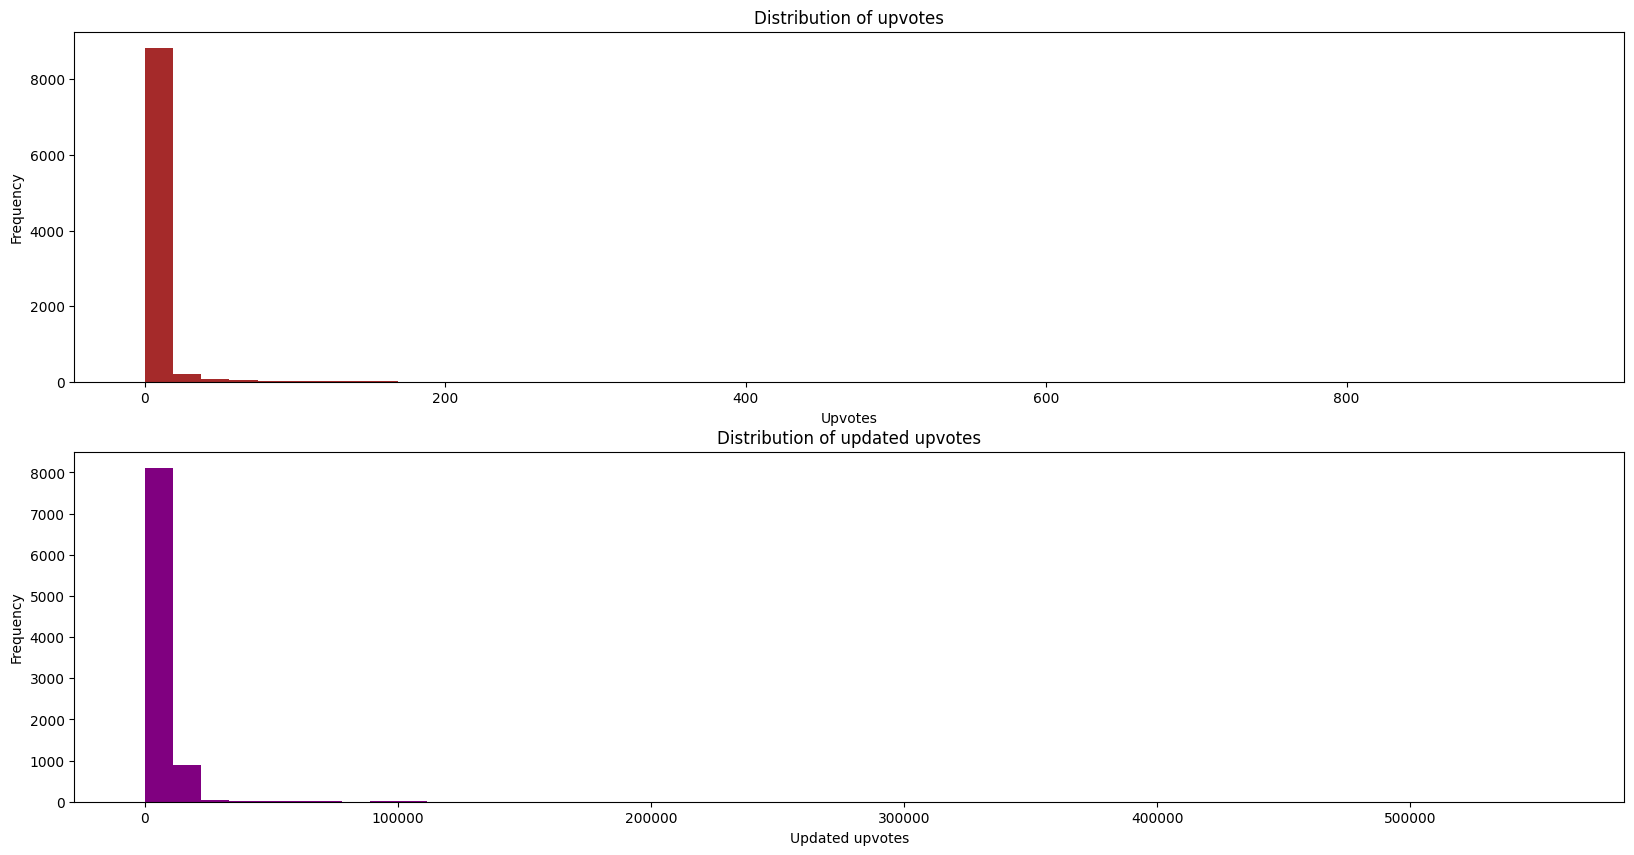

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))

ax = axes[0]
ax.hist(df["ups"], bins=50, color="brown")
ax.set_title("Distribution of upvotes")
ax.set_xlabel("Upvotes")
ax.set_ylabel("Frequency")

ax = axes[1] 
ax.hist(df["updated_ups"], bins=50, color="purple")
ax.set_title("Distribution of updated upvotes")
ax.set_xlabel("Updated upvotes")
ax.set_ylabel("Frequency")

fig.show()

In [45]:
df["updated_ups"].quantile(0.5)

np.float64(299.17618167574534)

In [46]:
df["ups"].quantile(0.9)

np.float64(8.0)

In [47]:
# pick above as criterion for virality 
# 50% of posts have greater than 300 upvotes 
# Criterion for virality - If a post has greater than 3 upvotes, it is considered viral 
# What % of posts are viral - Roughly 50% 

In [48]:
df["viral"] = False 
df.loc[df["updated_ups"] >= 300, "viral"] = True 

In [49]:
validation_df["viral"] = False 
validation_df.loc[validation_df["updated_ups"] >= 300, "viral"] = True 

In [50]:
df["viral"].value_counts()

viral
False    4643
True     4557
Name: count, dtype: int64

# Creating our models

We want create two models for our data 
1. Logistic regression classification model
2. XGBoost model

In [51]:
df.head()

,subreddit,title,name,upvote_ratio,ups,created,over_18,num_comments,subreddit_subscribers,created_utc,num_crossposts,is_video,updated_ups,updated_at,viral
0,pics,48,t3_1jf4ouq,1.0,1,1742410672.0,False,0,31807091,1742410672.0,0,False,162.000000,2025-03-31 14:54:16,False
1,AskReddit,"Ex Karen’s, what made you realize you were a K...",t3_1jf4op1,1.0,1,1742410662.0,False,0,52983358,1742410662.0,0,False,0.000000,2025-03-31 14:54:16,False
2,AskReddit,What’s the worst name you’ve ever heard someon...,t3_1jf4off,1.0,1,1742410643.0,False,1,52983358,1742410643.0,0,False,81.000000,2025-03-31 14:54:16,False
3,AskReddit,What was the reason that made you decide to re...,t3_1jf4o0c,1.0,2,1742410614.0,False,0,52983358,1742410614.0,0,False,792.092554,2025-03-31 14:54:16,True
4,AskReddit,What is your city known for ?,t3_1jf4noe,1.0,2,1742410591.0,False,2,52983358,1742410591.0,0,False,9855.000000,2025-03-31 14:54:16,True


In [52]:
df["created"] = pd.to_datetime(
    pd.to_numeric(
        df["created"], 
        errors="coerce"
    ), 
    unit="s", 
    errors="coerce"
)

In [53]:
validation_df["created"] = pd.to_datetime(
    pd.to_numeric(
        validation_df["created"], 
        errors="coerce"
    ), 
    unit="s", 
    errors="coerce"
)

In [54]:
def get_time_of_day_from_datetime(datetime_value):
    hour = datetime_value.hour 
    if hour >= 5 and hour < 12:
        return "morning"
    elif hour >= 12 and hour < 16:
        return "afternoon"
    elif hour >= 16 and hour < 20:
        return "evening"
    else:
        return "night"

In [55]:
df["time_of_day"] = df["created"].apply(lambda x : get_time_of_day_from_datetime(x))

In [56]:
validation_df["time_of_day"] = validation_df["created"].apply(lambda x : get_time_of_day_from_datetime(x))

In [57]:
df.head()

,subreddit,title,name,upvote_ratio,ups,created,over_18,num_comments,subreddit_subscribers,created_utc,num_crossposts,is_video,updated_ups,updated_at,viral,time_of_day
0,pics,48,t3_1jf4ouq,1.0,1,2025-03-19 18:57:52,False,0,31807091,1742410672.0,0,False,162.000000,2025-03-31 14:54:16,False,evening
1,AskReddit,"Ex Karen’s, what made you realize you were a K...",t3_1jf4op1,1.0,1,2025-03-19 18:57:42,False,0,52983358,1742410662.0,0,False,0.000000,2025-03-31 14:54:16,False,evening
2,AskReddit,What’s the worst name you’ve ever heard someon...,t3_1jf4off,1.0,1,2025-03-19 18:57:23,False,1,52983358,1742410643.0,0,False,81.000000,2025-03-31 14:54:16,False,evening
3,AskReddit,What was the reason that made you decide to re...,t3_1jf4o0c,1.0,2,2025-03-19 18:56:54,False,0,52983358,1742410614.0,0,False,792.092554,2025-03-31 14:54:16,True,evening
4,AskReddit,What is your city known for ?,t3_1jf4noe,1.0,2,2025-03-19 18:56:31,False,2,52983358,1742410591.0,0,False,9855.000000,2025-03-31 14:54:16,True,evening


In [58]:
# Further reduce the size of the data set - dropping columns that are not useful for modelling 
columns_to_drop = [
    "name", 
    "created", 
    "updated_at"
]
columns_to_drop = [column for column in columns_to_drop if column in df.columns]
df.drop(columns_to_drop, axis=1, inplace=True)

In [59]:
# Further reduce the size of the data set - dropping columns that are not useful for modelling 
columns_to_drop = [
    "name", 
    "created", 
    "updated_at"
]
columns_to_drop = [column for column in columns_to_drop if column in validation_df.columns]
validation_df.drop(columns_to_drop, axis=1, inplace=True)

In [60]:
df.head()

,subreddit,title,upvote_ratio,ups,over_18,num_comments,subreddit_subscribers,created_utc,num_crossposts,is_video,updated_ups,viral,time_of_day
0,pics,48,1.0,1,False,0,31807091,1742410672.0,0,False,162.000000,False,evening
1,AskReddit,"Ex Karen’s, what made you realize you were a K...",1.0,1,False,0,52983358,1742410662.0,0,False,0.000000,False,evening
2,AskReddit,What’s the worst name you’ve ever heard someon...,1.0,1,False,1,52983358,1742410643.0,0,False,81.000000,False,evening
3,AskReddit,What was the reason that made you decide to re...,1.0,2,False,0,52983358,1742410614.0,0,False,792.092554,True,evening
4,AskReddit,What is your city known for ?,1.0,2,False,2,52983358,1742410591.0,0,False,9855.000000,True,evening


In [61]:
subreddits = df["subreddit"].to_list()
subreddits.append("other")

In [62]:
# Apply LabelEncoder to transform sub-reddit names and time of day 
le_sub_reddit_names = LabelEncoder().fit(subreddits)

In [63]:
df["subreddit"] = le_sub_reddit_names.transform(df["subreddit"])

In [64]:
subreddits = [x if x in le_sub_reddit_names.classes_ else "other" for x in validation_df["subreddit"].to_list()]
validation_df["subreddit"] = le_sub_reddit_names.transform(subreddits)

In [65]:
le_time_of_day = LabelEncoder().fit(df["time_of_day"])

In [66]:
df["time_of_day"] = le_time_of_day.transform(df["time_of_day"])

In [67]:
validation_df["time_of_day"] = le_time_of_day.transform(validation_df["time_of_day"])

In [68]:
df.head()

,subreddit,title,upvote_ratio,ups,over_18,num_comments,subreddit_subscribers,created_utc,num_crossposts,is_video,updated_ups,viral,time_of_day
0,37,48,1.0,1,False,0,31807091,1742410672.0,0,False,162.000000,False,1
1,0,"Ex Karen’s, what made you realize you were a K...",1.0,1,False,0,52983358,1742410662.0,0,False,0.000000,False,1
2,0,What’s the worst name you’ve ever heard someon...,1.0,1,False,1,52983358,1742410643.0,0,False,81.000000,False,1
3,0,What was the reason that made you decide to re...,1.0,2,False,0,52983358,1742410614.0,0,False,792.092554,True,1
4,0,What is your city known for ?,1.0,2,False,2,52983358,1742410591.0,0,False,9855.000000,True,1


In [69]:
# Transform boolean columns to numeric 
df["over_18"] = df["over_18"].astype("bool")
df.loc[df["over_18"] == True, "over_18"] = 1
df.loc[df["over_18"] == False, "over_18"] = 0

/var/folders/w1/mw0q783s1b5bj1lkrz62mvwr0000gp/T/ipykernel_9937/3475651403.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df["over_18"] == True, "over_18"] = 1


In [70]:
# Transform boolean columns to numeric 
validation_df["over_18"] = validation_df["over_18"].astype("bool")
validation_df.loc[df["over_18"] == True, "over_18"] = 1
validation_df.loc[df["over_18"] == False, "over_18"] = 0

/var/folders/w1/mw0q783s1b5bj1lkrz62mvwr0000gp/T/ipykernel_9937/2534230050.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  validation_df.loc[df["over_18"] == True, "over_18"] = 1


In [71]:
df["viral"] = df["viral"].astype("bool")
df.loc[df["viral"] == True, "viral"] = 1
df.loc[df["viral"] == False, "viral"] = 0

/var/folders/w1/mw0q783s1b5bj1lkrz62mvwr0000gp/T/ipykernel_9937/3541727942.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df["viral"] == True, "viral"] = 1


In [72]:
validation_df["viral"] = validation_df["viral"].astype("bool")
validation_df.loc[validation_df["viral"] == True, "viral"] = 1
validation_df.loc[df["viral"] == False, "viral"] = 0

/var/folders/w1/mw0q783s1b5bj1lkrz62mvwr0000gp/T/ipykernel_9937/4162847272.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  validation_df.loc[validation_df["viral"] == True, "viral"] = 1


In [73]:
df["is_video"] = df["is_video"].astype("bool")
df.loc[df["is_video"] == True, "is_video"] = 1
df.loc[df["is_video"] == False, "is_video"] = 0

/var/folders/w1/mw0q783s1b5bj1lkrz62mvwr0000gp/T/ipykernel_9937/1069456512.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df["is_video"] == True, "is_video"] = 1


In [74]:
validation_df["is_video"] = validation_df["is_video"].astype("bool")
validation_df.loc[df["is_video"] == True, "is_video"] = 1
validation_df.loc[df["is_video"] == False, "is_video"] = 0

/var/folders/w1/mw0q783s1b5bj1lkrz62mvwr0000gp/T/ipykernel_9937/2293247027.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  validation_df.loc[df["is_video"] == True, "is_video"] = 1


In [75]:
df.head()

,subreddit,title,upvote_ratio,ups,over_18,num_comments,subreddit_subscribers,created_utc,num_crossposts,is_video,updated_ups,viral,time_of_day
0,37,48,1.0,1,1,0,31807091,1742410672.0,0,1,162.000000,0,1
1,0,"Ex Karen’s, what made you realize you were a K...",1.0,1,1,0,52983358,1742410662.0,0,1,0.000000,0,1
2,0,What’s the worst name you’ve ever heard someon...,1.0,1,1,1,52983358,1742410643.0,0,1,81.000000,0,1
3,0,What was the reason that made you decide to re...,1.0,2,1,0,52983358,1742410614.0,0,1,792.092554,1,1
4,0,What is your city known for ?,1.0,2,1,2,52983358,1742410591.0,0,1,9855.000000,1,1


In [76]:
def preprocess_title(text):
    text = str(text).lower()
    text = re.sub(rf"[{re.escape(string.punctuation)}]", "", text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return " ".join(tokens)

In [77]:
df["title"] = df["title"].apply(preprocess_title)

In [78]:
validation_df["title"] = validation_df["title"].apply(preprocess_title)

In [79]:
tfidf = TfidfVectorizer(max_features=200)
X_text = tfidf.fit_transform(df['title'])

In [80]:
X_text

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20994 stored elements and shape (9200, 200)>

In [81]:
X_validation_text = tfidf.fit_transform(validation_df['title'])

In [82]:
# Drop the title column now from the original dataframe 
df.drop("title", axis=1, inplace=True)

In [83]:
validation_df.drop("title", axis=1, inplace=True)

In [84]:
df.head()

,subreddit,upvote_ratio,ups,over_18,num_comments,subreddit_subscribers,created_utc,num_crossposts,is_video,updated_ups,viral,time_of_day
0,37,1.0,1,1,0,31807091,1742410672.0,0,1,162.000000,0,1
1,0,1.0,1,1,0,52983358,1742410662.0,0,1,0.000000,0,1
2,0,1.0,1,1,1,52983358,1742410643.0,0,1,81.000000,0,1
3,0,1.0,2,1,0,52983358,1742410614.0,0,1,792.092554,1,1
4,0,1.0,2,1,2,52983358,1742410591.0,0,1,9855.000000,1,1


In [85]:
y = df["viral"].to_numpy()

In [86]:
y = np.array(y, dtype=int)

In [87]:
y_validation = validation_df["viral"].to_numpy()
y_validation = np.array(y_validation, dtype=int)

In [88]:
df.drop("viral", axis=1, inplace=True)

In [89]:
validation_df.drop("viral", axis=1, inplace=True)

In [90]:
# Scale the dataframe using standard scalar 
standard_scaler = StandardScaler().fit(df)

In [91]:
X_numeric = standard_scaler.transform(df)

In [92]:
validation_df.head()

,subreddit,upvote_ratio,ups,over_18,num_comments,subreddit_subscribers,created_utc,num_crossposts,is_video,updated_ups,time_of_day
0,0,0.91,46,1,10396,54135807,1744803485.0,5,1,3575,2
1,34,0.98,54,1,868,942154,1744822595.0,3,1,15897,1
2,34,0.93,37,1,9810,36189,1744773491.0,0,1,17352,3
3,37,0.95,5,1,15,32183739,1744819004.0,2,1,25025,0
4,25,0.93,46,1,4429,46372784,1744799801.0,2,1,21462,2


In [93]:
validation_df = standard_scaler.transform(validation_df)

In [94]:
X = hstack([X_numeric, X_text])
X = X.toarray()

In [95]:
X_validation = hstack([validation_df, X_validation_text])
X_validation = X_validation.toarray()

In [96]:
X[np.isnan(X)] = 1e-8

In [97]:
X_validation[np.isnan(X_validation)] = 1e-8

In [98]:
X_validation.shape

(200, 211)

In [99]:
X.shape

(9200, 211)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
np.min(X), np.max(X), np.min(y), np.max(y)

(np.float64(-3.3074101354490493),
 np.float64(39.28559276233986),
 np.int64(0),
 np.int64(1))

In [102]:
# --- Logistic Regression ---
lr = LogisticRegression(max_iter=1000, class_weight="balanced")
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("🔹 Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

🔹 Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       917
           1       0.97      0.78      0.86       923

    accuracy                           0.88      1840
   macro avg       0.89      0.88      0.87      1840
weighted avg       0.89      0.88      0.87      1840

Accuracy: 0.8755434782608695


/Users/saileshrajaputra/development/venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/saileshrajaputra/development/venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/saileshrajaputra/development/venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/saileshrajaputra/development/venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/saileshrajaputra/development/venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountere

In [103]:
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\n🔸 XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


🔸 XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       917
           1       1.00      1.00      1.00       923

    accuracy                           1.00      1840
   macro avg       1.00      1.00      1.00      1840
weighted avg       1.00      1.00      1.00      1840

Accuracy: 0.9989130434782608


In [104]:
# Validation metrics

In [105]:
y_pred_lr = lr.predict(X_validation)

print("🔹 Logistic Regression:")
print(classification_report(y_validation, y_pred_lr))
print("Accuracy:", accuracy_score(y_validation, y_pred_lr))

🔹 Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.59      0.70       152
           1       0.34      0.69      0.46        48

    accuracy                           0.61       200
   macro avg       0.60      0.64      0.58       200
weighted avg       0.73      0.61      0.64       200

Accuracy: 0.61


/Users/saileshrajaputra/development/venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/saileshrajaputra/development/venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/saileshrajaputra/development/venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [107]:
y_pred_xgb = xgb.predict(X_validation)

print("\n🔸 XGBoost:")
print(classification_report(y_validation, y_pred_xgb))
print("Accuracy:", accuracy_score(y_validation, y_pred_xgb))


🔸 XGBoost:
              precision    recall  f1-score   support

           0       1.00      0.66      0.79       152
           1       0.48      1.00      0.65        48

    accuracy                           0.74       200
   macro avg       0.74      0.83      0.72       200
weighted avg       0.88      0.74      0.76       200

Accuracy: 0.74
